In [1]:
import pandas as pd
import requests
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# Descargar los datos
url_path = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/"
serie_produccion_cobre = "RD12951DM"
serie_pbi_mineria = "PN01760AM"
formato = "/json"
per = "/2003-1-1/2023-12-31"

# Construir las URLs
url_produccion = url_path + serie_produccion_cobre + formato + per
url_pbi_mineria = url_path + serie_pbi_mineria + formato + per

# Obtener los datos
response_produccion = requests.get(url_produccion)
response_pbi_mineria = requests.get(url_pbi_mineria)
response_json_produccion = response_produccion.json()
response_json_pbi = response_pbi_mineria.json()
print(response_json_pbi)
print(response_json_produccion)

{'config': {'title': 'Producto bruto interno y demanda interna (índice 2007=100)', 'series': [{'name': 'Producto bruto interno y demanda interna (índice 2007=100) - Minería e Hidrocarburos - Minería Metálica', 'dec': '1'}]}, 'periods': [{'name': 'Ene.2003', 'values': ['82.4075011992604']}, {'name': 'Feb.2003', 'values': ['73.9366077657641']}, {'name': 'Mar.2003', 'values': ['78.7705384864045']}, {'name': 'Abr.2003', 'values': ['78.8410379248643']}, {'name': 'May.2003', 'values': ['82.9645563661161']}, {'name': 'Jun.2003', 'values': ['83.9423502802049']}, {'name': 'Jul.2003', 'values': ['82.3323173890006']}, {'name': 'Ago.2003', 'values': ['83.383005326781']}, {'name': 'Sep.2003', 'values': ['84.7245366423025']}, {'name': 'Oct.2003', 'values': ['89.2655902500764']}, {'name': 'Nov.2003', 'values': ['83.9277285523977']}, {'name': 'Dic.2003', 'values': ['83.3385522625217']}, {'name': 'Ene.2004', 'values': ['89.5294857995667']}, {'name': 'Feb.2004', 'values': ['87.8560226487605']}, {'name':

In [3]:
for key in response_json_produccion.keys():
    print(key)
for keyy in response_json_pbi.keys():
    print(keyy)

config
periods
config
periods


In [4]:
print(response_json_pbi['config'])
print(response_json_produccion['config'])

{'title': 'Producto bruto interno y demanda interna (índice 2007=100)', 'series': [{'name': 'Producto bruto interno y demanda interna (índice 2007=100) - Minería e Hidrocarburos - Minería Metálica', 'dec': '1'}]}
{'title': 'Producción de productos mineros según departamentos', 'series': [{'name': 'Producción de productos mineros según departamentos - Cobre - Total (tm.f)', 'dec': '0'}]}


In [5]:
print(response_json_produccion['periods'])
print(response_json_pbi['periods'])

[{'name': 'Ene.2003', 'values': ['75341.643062']}, {'name': 'Feb.2003', 'values': ['63342.272595']}, {'name': 'Mar.2003', 'values': ['70220.004047']}, {'name': 'Abr.2003', 'values': ['70243.523953']}, {'name': 'May.2003', 'values': ['67834.291828']}, {'name': 'Jun.2003', 'values': ['70674.156497']}, {'name': 'Jul.2003', 'values': ['64646.944545']}, {'name': 'Ago.2003', 'values': ['70356.708512']}, {'name': 'Sep.2003', 'values': ['66183.955671']}, {'name': 'Oct.2003', 'values': ['76856.56321']}, {'name': 'Nov.2003', 'values': ['71729.949027']}, {'name': 'Dic.2003', 'values': ['75175.065683']}, {'name': 'Ene.2004', 'values': ['74029.845141']}, {'name': 'Feb.2004', 'values': ['81671.461574']}, {'name': 'Mar.2004', 'values': ['88863.239808']}, {'name': 'Abr.2004', 'values': ['88389.408373']}, {'name': 'May.2004', 'values': ['77341.044862']}, {'name': 'Jun.2004', 'values': ['93564.685337']}, {'name': 'Jul.2004', 'values': ['79662.417929']}, {'name': 'Ago.2004', 'values': ['87285.184448']}, 

In [6]:
print(response_json_produccion['periods'][0])
print(response_json_pbi['periods'][0])

{'name': 'Ene.2003', 'values': ['75341.643062']}
{'name': 'Ene.2003', 'values': ['82.4075011992604']}


In [7]:
print(response_json_produccion['periods'][0]['values'])
print(response_json_pbi['periods'][0]['values'])

['75341.643062']
['82.4075011992604']


In [8]:
periodos_produccion = response_json_produccion.get('periods', [])
produccion_index = []
for b in periodos_produccion:
    valoress = b.get('values', [])
    for x in valoress:
        if x != 'n.d.':
            produccion_index.append(float(x))
        else:
            produccion_index.append(None)  # Reemplazar con None (NaN en Pandas)
print(produccion_index)

[75341.643062, 63342.272595, 70220.004047, 70243.523953, 67834.291828, 70674.156497, 64646.944545, 70356.708512, 66183.955671, 76856.56321, 71729.949027, 75175.065683, 74029.845141, 81671.461574, 88863.239808, 88389.408373, 77341.044862, 93564.685337, 79662.417929, 87285.184448, 91356.583546, 84809.478115, 86119.367333, 102481.333264, 80837.679383, 76402.054203, 85784.049283, 79628.96028, 83264.297148, 75999.442529, 82507.041565, 86602.436758, 83884.69274, 93530.739816, 82924.233052, 98532.291666, 87754.374324, 72300.51535, 95764.671045, 89711.480357, 81633.015389, 82925.715388, 87588.34109, 85145.734978, 85213.673282, 92609.272256, 91182.618668, 96643.051463, 83091.406114, 82498.286175, 100609.403113, 94348.569679, 98748.545746, 94737.923317, 99968.236306, 109130.170429, 104061.743803, 113514.923557, 99316.660638, 110247.735039, 84833.617193, 100278.605754, 105874.83366, 103552.724202, 107921.427495, 103680.397127, 109212.705992, 108199.641376, 104830.843754, 106881.397068, 116026.645

In [9]:
periodos_pbi = response_json_pbi.get('periods', [])
pbi_index = []
for b in periodos_pbi:
    valoress = b.get('values', [])
    for x in valoress:
        if x != 'n.d.':
            pbi_index.append(float(x))
        else:
            pbi_index.append(None)  # Reemplazar con None (NaN en Pandas)
print(pbi_index)

[82.4075011992604, 73.9366077657641, 78.7705384864045, 78.8410379248643, 82.9645563661161, 83.9423502802049, 82.3323173890006, 83.383005326781, 84.7245366423025, 89.2655902500764, 83.9277285523977, 83.3385522625217, 89.5294857995667, 87.8560226487605, 88.6559697136424, 90.2476765050148, 85.1922173396879, 86.203138946889, 83.616851248634, 92.2965742397519, 90.2763489200132, 93.3830813423892, 90.9648570113052, 97.3942400946002, 91.9290639959359, 87.0873363685122, 91.0092017755249, 87.5682943751354, 88.8630367489441, 92.1306243653826, 95.6973672932915, 96.42503303809, 97.3738651977569, 108.51353341375, 102.105640650754, 107.249986202428, 97.1248298795677, 87.6894626354309, 101.245717074305, 95.9051013560729, 95.585333740657, 95.4000879596665, 96.9988249097295, 95.5530077256568, 93.7670726602275, 99.7610889056344, 98.2426448408161, 99.2790264241292, 90.2301210037479, 85.4409201987881, 102.021617257759, 94.9253289927199, 97.6907735707628, 94.3143435315612, 102.215267377669, 105.440711515984

In [10]:
fechas = [q['name'] for q in periodos_produccion]
print(fechas)

['Ene.2003', 'Feb.2003', 'Mar.2003', 'Abr.2003', 'May.2003', 'Jun.2003', 'Jul.2003', 'Ago.2003', 'Sep.2003', 'Oct.2003', 'Nov.2003', 'Dic.2003', 'Ene.2004', 'Feb.2004', 'Mar.2004', 'Abr.2004', 'May.2004', 'Jun.2004', 'Jul.2004', 'Ago.2004', 'Sep.2004', 'Oct.2004', 'Nov.2004', 'Dic.2004', 'Ene.2005', 'Feb.2005', 'Mar.2005', 'Abr.2005', 'May.2005', 'Jun.2005', 'Jul.2005', 'Ago.2005', 'Sep.2005', 'Oct.2005', 'Nov.2005', 'Dic.2005', 'Ene.2006', 'Feb.2006', 'Mar.2006', 'Abr.2006', 'May.2006', 'Jun.2006', 'Jul.2006', 'Ago.2006', 'Sep.2006', 'Oct.2006', 'Nov.2006', 'Dic.2006', 'Ene.2007', 'Feb.2007', 'Mar.2007', 'Abr.2007', 'May.2007', 'Jun.2007', 'Jul.2007', 'Ago.2007', 'Sep.2007', 'Oct.2007', 'Nov.2007', 'Dic.2007', 'Ene.2008', 'Feb.2008', 'Mar.2008', 'Abr.2008', 'May.2008', 'Jun.2008', 'Jul.2008', 'Ago.2008', 'Sep.2008', 'Oct.2008', 'Nov.2008', 'Dic.2008', 'Ene.2009', 'Feb.2009', 'Mar.2009', 'Abr.2009', 'May.2009', 'Jun.2009', 'Jul.2009', 'Ago.2009', 'Sep.2009', 'Oct.2009', 'Nov.2009', 'Di

In [11]:
glosario = {"Fechas": fechas, "Produccion": produccion_index, "PBI": pbi_index}
df=pd.DataFrame(glosario)

In [12]:
# Asegurarse de que 'Fechas' es de tipo datetime y los valores son numéricos
df['Fechas'] = pd.to_datetime(df['Fechas'], errors='coerce')
df['Produccion'] = pd.to_numeric(df['Produccion'], errors='coerce')
df['PBI'] = pd.to_numeric(df['PBI'], errors='coerce')

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_14596\371859145.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Fechas'] = pd.to_datetime(df['Fechas'], errors='coerce')


In [13]:
# Eliminar filas con NaN
df = df.dropna(subset=['Fechas', 'Produccion', 'PBI'])
# Modelo de Regresión Lineal
X = df[['Produccion']]
y = df['PBI']
X = sm.add_constant(X)  # Añadir una constante al modelo
modelo = sm.OLS(y, X).fit()

# Predicciones
predicciones = modelo.predict(X)

# Resumen del modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                    PBI   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     3773.
Date:                Sat, 16 Nov 2024   Prob (F-statistic):          4.45e-116
Time:                        18:46:49   Log-Likelihood:                -511.47
No. Observations:                 168   AIC:                             1027.
Df Residuals:                     166   BIC:                             1033.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.3446      1.122     47.547      0.0

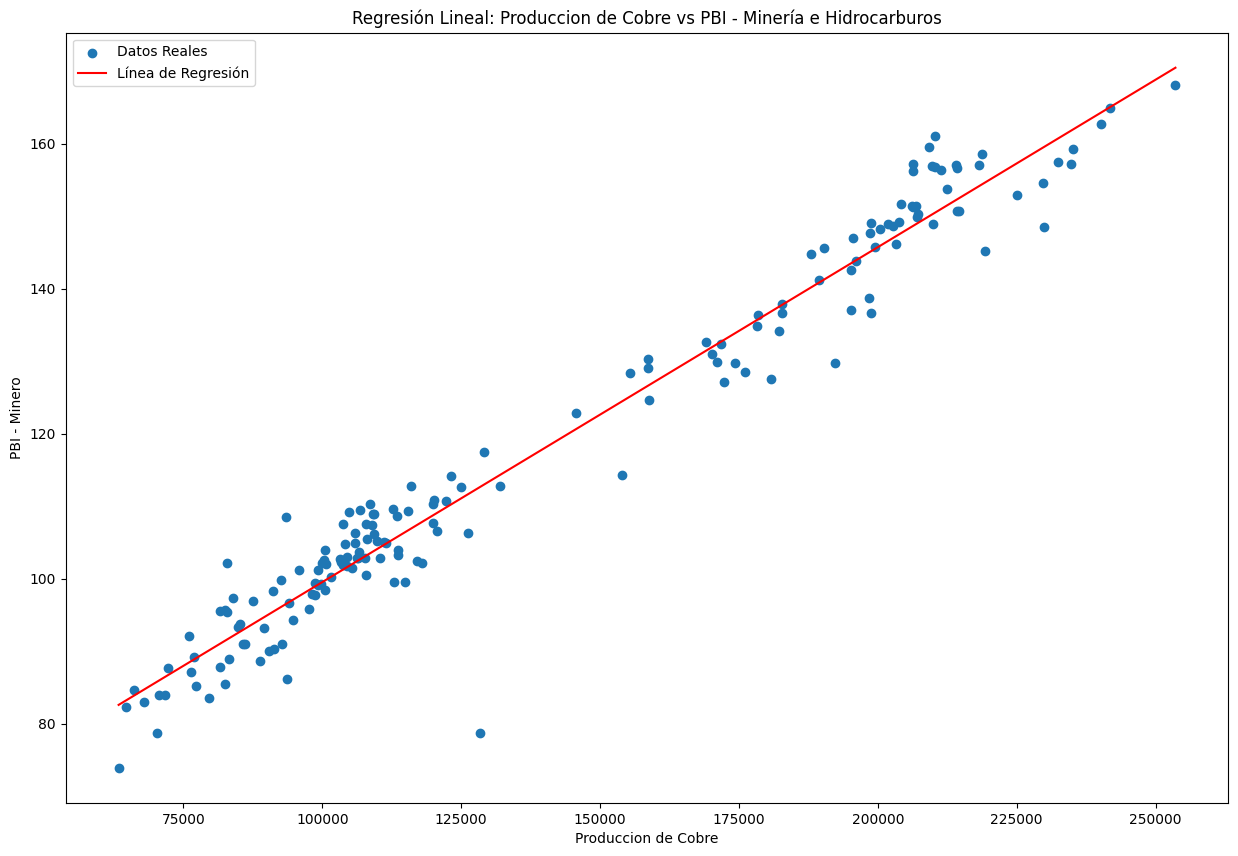

In [14]:
plt.figure(figsize=(15, 10))
plt.scatter(df['Produccion'], df['PBI'], label='Datos Reales')
plt.plot(df['Produccion'], predicciones, color='red', label='Línea de Regresión')
plt.xlabel('Produccion de Cobre')
plt.ylabel('PBI - Minero')
plt.title('Regresión Lineal: Produccion de Cobre vs PBI - Minería e Hidrocarburos')
plt.legend()
plt.show()

In [16]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PBI   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     3773.
Date:                Sat, 16 Nov 2024   Prob (F-statistic):          4.45e-116
Time:                        18:47:09   Log-Likelihood:                -511.47
No. Observations:                 168   AIC:                             1027.
Df Residuals:                     166   BIC:                             1033.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.3446      1.122     47.547      0.000      51.130      55.560
Produccion     0.0005   7.52e-06     61.429      0.000       0.000       0.000
==============================================================================
Omnibus:                       95.438   Durbin-Watson:                   0.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              886.283
Skew:                          -1.867   Prob(JB):                    3.52e-193
Kurtosis:                      13.614   Cond. No.                     4.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""